Anzhela Davityan

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom, norm, poisson

Problem 5 (Python or R) (11 points)
Let Xn ∼ Poisson((n+1)/n ), prove that Xn converges in probability to some n random variable X. Find distribution of X.

In [5]:
num_simulations = 10000
epsilon = 1

def check_convergence(n):
    X_n = poisson.rvs((n + 1) / n, size=num_simulations)  
    X = poisson.rvs(1, size=num_simulations)  
    prob_convergence = np.mean(np.abs(X_n - X) >= epsilon)  
    return prob_convergence

n_values = [100, 250, 500, 1000, 10000]  

for n in n_values:
    prob_convergence = check_convergence(n)
    print(f"Probability of |X_n - X| >= {epsilon} for n = {n}: {prob_convergence}")

Probability of |X_n - X| >= 1 for n = 100: 0.69
Probability of |X_n - X| >= 1 for n = 250: 0.6956
Probability of |X_n - X| >= 1 for n = 500: 0.6884
Probability of |X_n - X| >= 1 for n = 1000: 0.6913
Probability of |X_n - X| >= 1 for n = 10000: 0.6908


Problem 6 (Python or R) (15 points)
Use visualization tools to show that these 3 Binomial distributions are similar to Normal and Poisonn distribution and find the parameters of Normal and Poisson distributions which are more similar to these binomial distribution.

• (p=0.1,n=1000)
• (p = 0.05,n = 6,000) 
• (p = 0.01,n = 20,000)

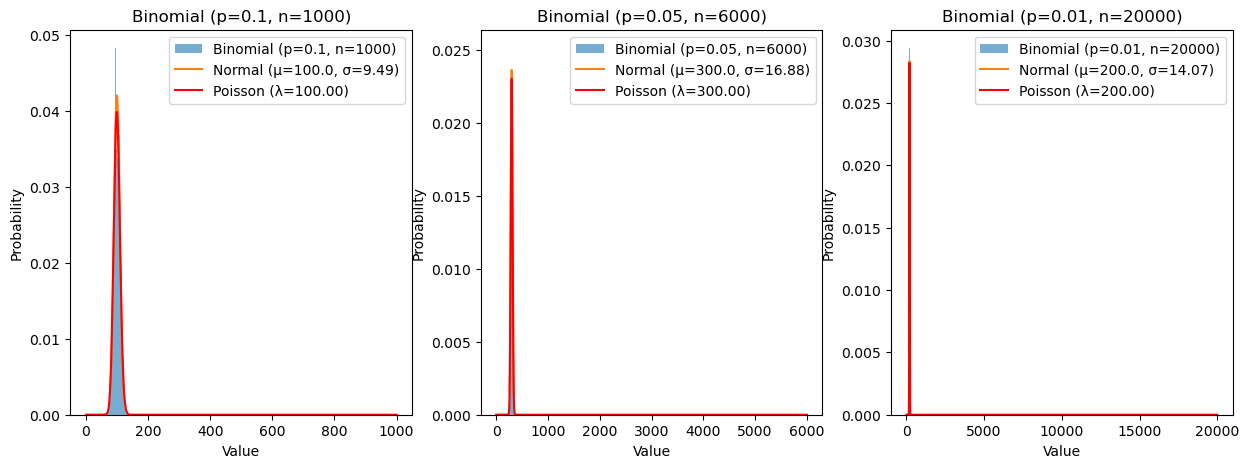

In [6]:
import matplotlib.pyplot as plt
from scipy.stats import binom, norm, poisson

parameters = [(0.1, 1000), (0.05, 6000), (0.01, 20000)]

binomial_samples = [np.random.binomial(n, p, size=10000) for p, n in parameters]

plt.figure(figsize=(15, 5))

for i, (p, n) in enumerate(parameters, start=1):
    plt.subplot(1, 3, i)
    plt.hist(binomial_samples[i-1], bins=30, density=True, alpha=0.6, label='Binomial (p={}, n={})'.format(p, n))
    plt.title('Binomial (p={}, n={})'.format(p, n))
    plt.xlabel('Value')
    plt.ylabel('Probability')
    
    mean = p * n
    var = p * (1 - p) * n
    std_dev = np.sqrt(var)
    x = np.linspace(binom.ppf(0.01, n, p), binom.ppf(0.99, n, p), 100)
    plt.plot(x, norm.pdf(x, mean, std_dev), label='Normal (μ={}, σ={:.2f})'.format(mean, std_dev))
    
    lambda_ = p * n
    x_poisson = np.arange(0, n+1)
    plt.plot(x_poisson, poisson.pmf(x_poisson, lambda_), 'r-', label='Poisson (λ={:.2f})'.format(lambda_))
    
    plt.legend()

plt.show()


Problem 7 (Python or R) (15 points) 
For X ∼ N(1,1), find a number k such that
1. P(X ≤ k) = 0.1 (5 points)
2. P(−k≤X≤k)=0.84(5points)
3. How much area (probability) is to the left of 0? (5 points)

In [7]:
mean = 1
std_dev = 1

k1 = norm.ppf(0.1, loc=mean, scale=std_dev)

k2 = norm.ppf((1-0.84)/2, loc=mean, scale=std_dev)

area_left_of_zero = norm.cdf(0, loc=mean, scale=std_dev)

print("Problem 1: k such that P(X ≤ k) = 0.1 is", k1)
print("Problem 2: k such that P(-k ≤ X ≤ k) = 0.84 is", k2)
print("Problem 3: Probability to the left of 0 is", area_left_of_zero)


Problem 1: k such that P(X ≤ k) = 0.1 is -0.28155156554460037
Problem 2: k such that P(-k ≤ X ≤ k) = 0.84 is -0.4050715603096322
Problem 3: Probability to the left of 0 is 0.15865525393145707
